In [1]:
# All imports (TODO: Add appropriate packages if necessary)
import numpy as np
import matplotlib.pyplot as plt
from utils import *

### TODO: Part 1 - Estimate the vector field with a linear operator and compute mean squared error to the solution after $\Delta t$

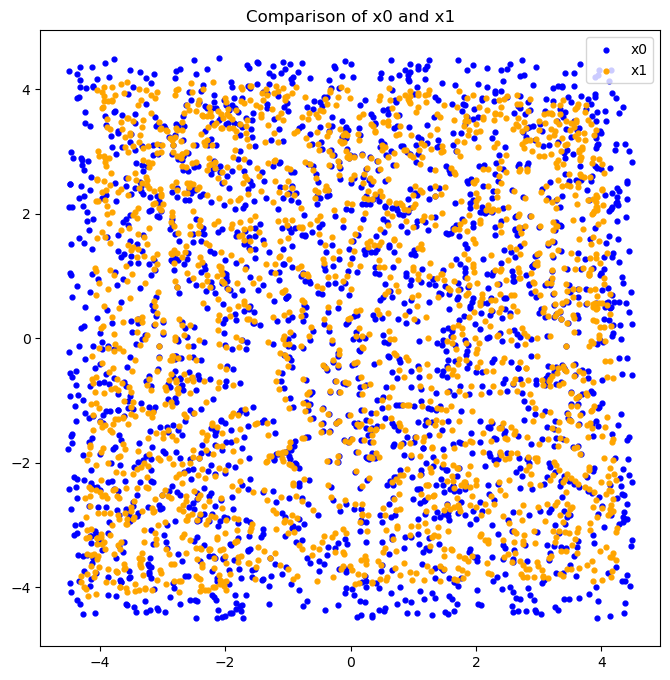

In [2]:
x0 = np.loadtxt("../../data/nonlinear_vectorfield_data_x0.txt")
x1 = np.loadtxt("../../data/nonlinear_vectorfield_data_x1.txt")

plt.figure(figsize=(8, 8))
plt.scatter(x0[:, 0], x0[:, 1], color='blue', alpha=1, label='x0', s=12)
plt.scatter(x1[:, 0], x1[:, 1], color='orange', alpha=1, label='x1', s=12)

plt.legend()
plt.title('Comparison of x0 and x1')
plt.show()

Dt = 0.001
v_k = (x1 - x0)/Dt
A, _, _, _ = least_squares(x0, v_k, cond = 1e-5)

In [3]:
ti = 0.
tf = 0.011
dt = 0.0001
x_pred, _, _ = find_best_tf(x0, x1, ti, tf, dt, A)

Best final solution x1 found for tf = 0.001.
Mean squared error for best final time = 0.03729185732707636.
Mean square error for final time tf = 0.011, mse = 0.854455739902207.


### TODO: Part 2 - Approximate the vector field with RBF and compute mean squared error to the solution after $\Delta t$

In [4]:
num_x_l_list = np.linspace(100, 1000, 19, dtype = int)  # Example list of number of centers to try
eps_list = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]  # Example list of epsilon values to try

best_x_pred, best_mse, best_tf, best_L, best_eps = find_best_L_and_eps(x0, x1, v_k, ti, tf, dt, num_x_l_list, eps_list, verbose = True)

Using 100 centroids
Using 150 centroids
Using 200 centroids
Using 250 centroids
Using 300 centroids
Using 350 centroids
Using 400 centroids
Using 450 centroids
Using 500 centroids
Using 550 centroids
Using 600 centroids
Using 650 centroids
Using 700 centroids
Using 750 centroids
Using 800 centroids
Using 850 centroids
Using 900 centroids
Using 950 centroids
Using 1000 centroids
Best final solution x1 found for tf = 0.011, L = 250, eps = 5.0.
Mean squared error for best solution = 0.0002569283569653359.


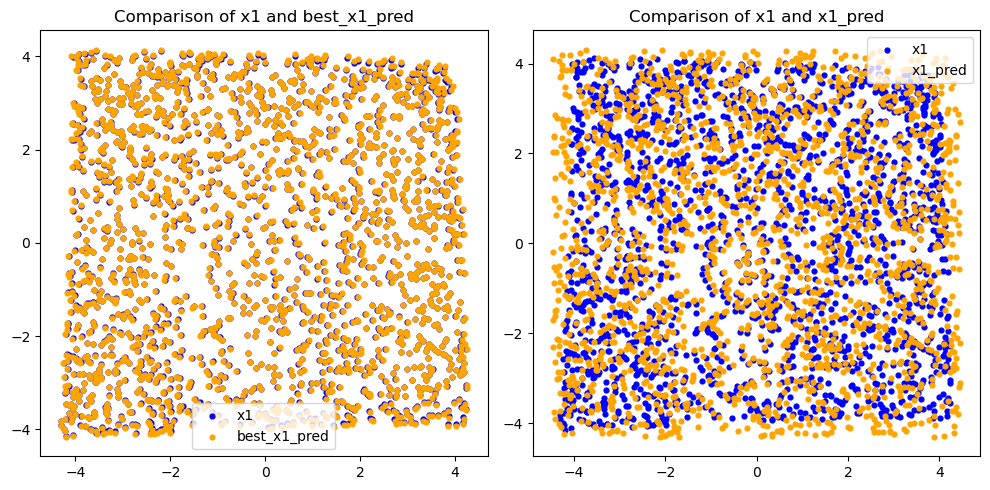

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1[:, 0], x1[:, 1], color='blue', alpha=1, label='x1', s=12)
plt.scatter(best_x_pred[:, 0], best_x_pred[:, 1], color='orange', alpha=1, label='best_x1_pred', s=12)
plt.legend()
plt.title('Comparison of x1 and best_x1_pred')


plt.subplot(1, 2, 2)
plt.scatter(x1[:, 0], x1[:, 1], color='blue', alpha=1, label='x1', s=12)
plt.scatter(x_pred[:, 0], x_pred[:, 1], color='orange', alpha=1, label='x1_pred', s=12)
plt.legend()
plt.title('Comparison of x1 and x1_pred')

plt.tight_layout()
plt.show()

### TODO: Part 3 - Analysis of the system

In [ ]:
plot_steady_states(x0, x1, v_k, ti, tf = 30, dt = dt, L = best_L, eps = best_eps)